In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import seaborn as sns

In [3]:
data_dic = ["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea", "Extent", "Perimeter", "Class"]
data = pd.read_excel("./dataset/Raisin_Dataset.xlsx", names=data_dic)
print(data.keys())
data.isnull().sum().to_frame('nan_count') # 데이터 결측치 판단

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')


,nan_count
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
Extent,0
Perimeter,0
Class,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


<Axes: >

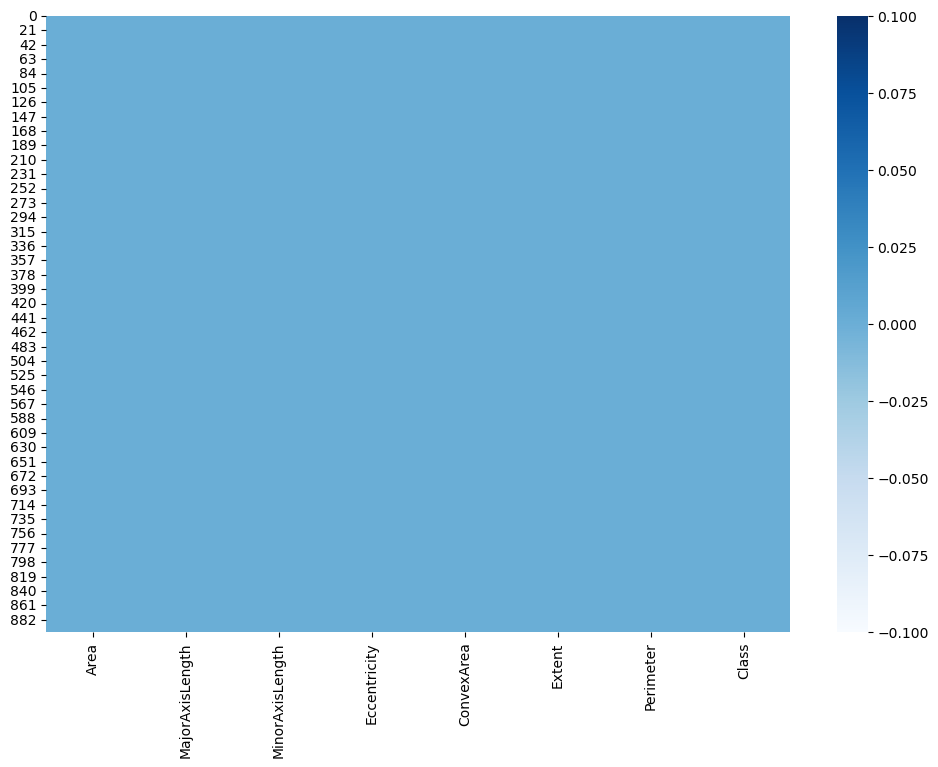

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cmap="Blues")

In [8]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_7454/3201711750.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = data.corr(), annot=True, fmt=".2f", linewidths=.5, cmap="Blues")


<Axes: >

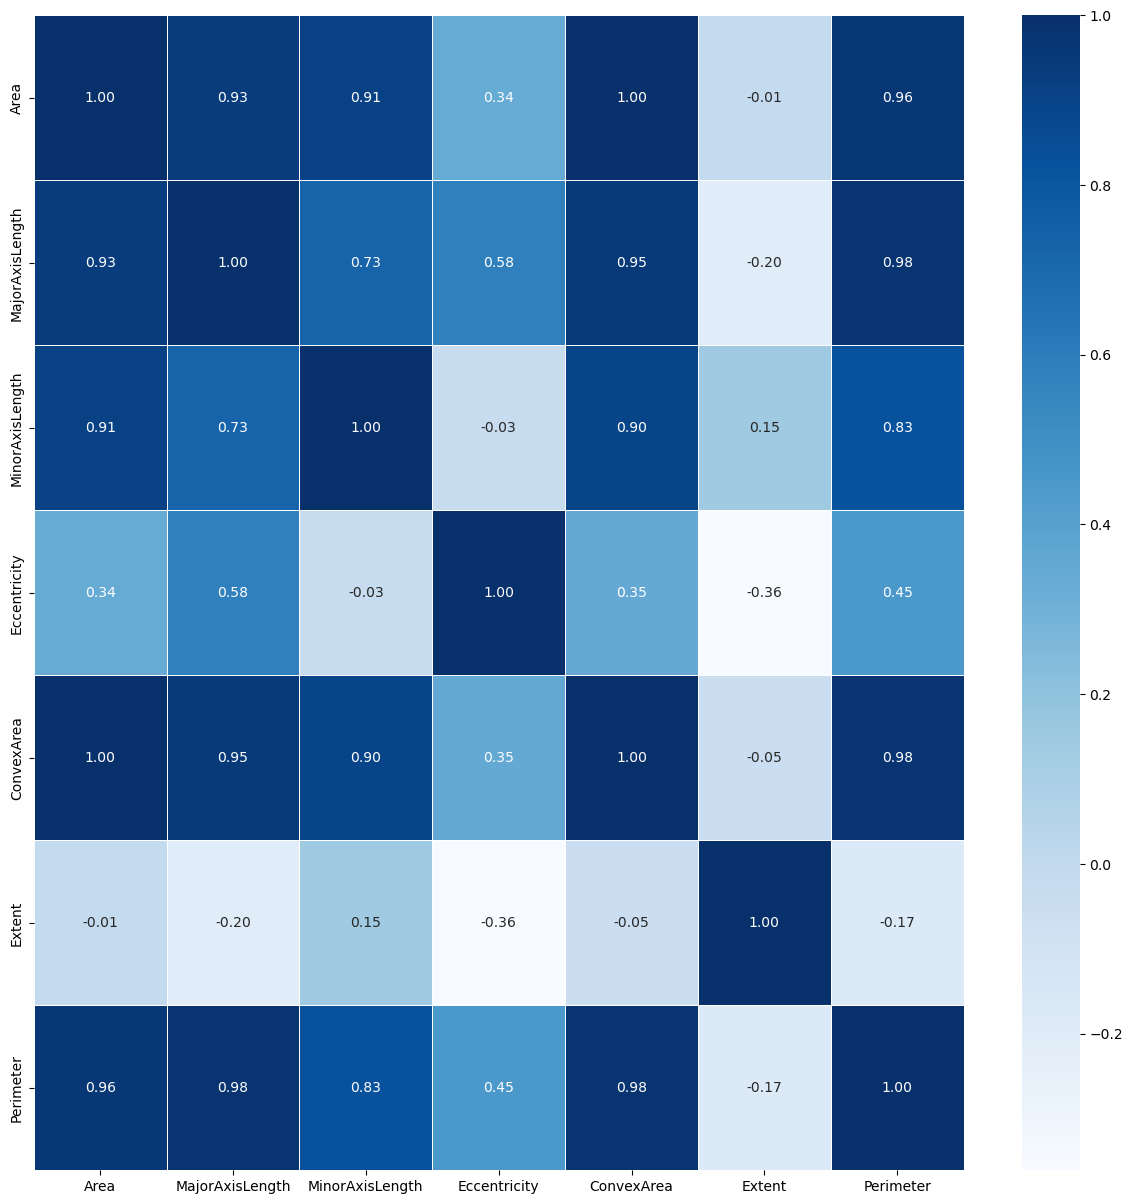

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(data = data.corr(), annot=True, fmt=".2f", linewidths=.5, cmap="Blues")

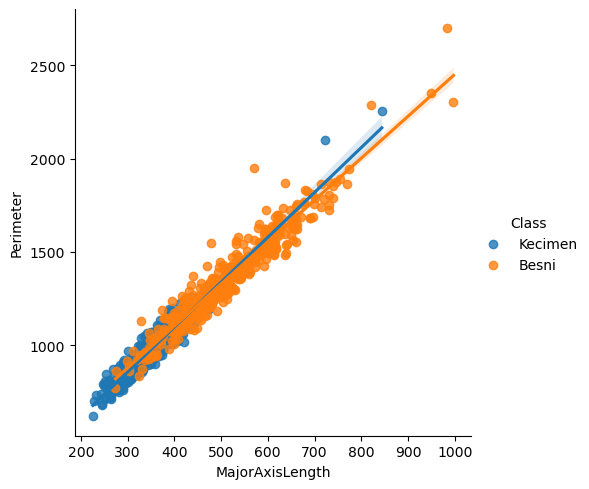

In [17]:
sns.lmplot(data=data, x="MajorAxisLength", y="Perimeter", hue="Class")

<Axes: xlabel='Class', ylabel='count'>

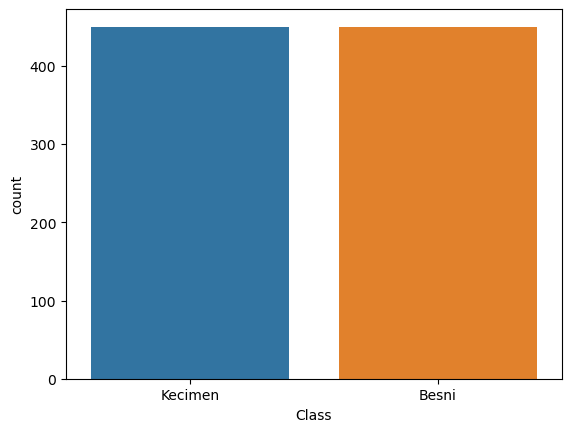

In [6]:
data.shape
sns.countplot(data=data, x=data["Class"])

(900, 9)
(603, 7) (603, 2)


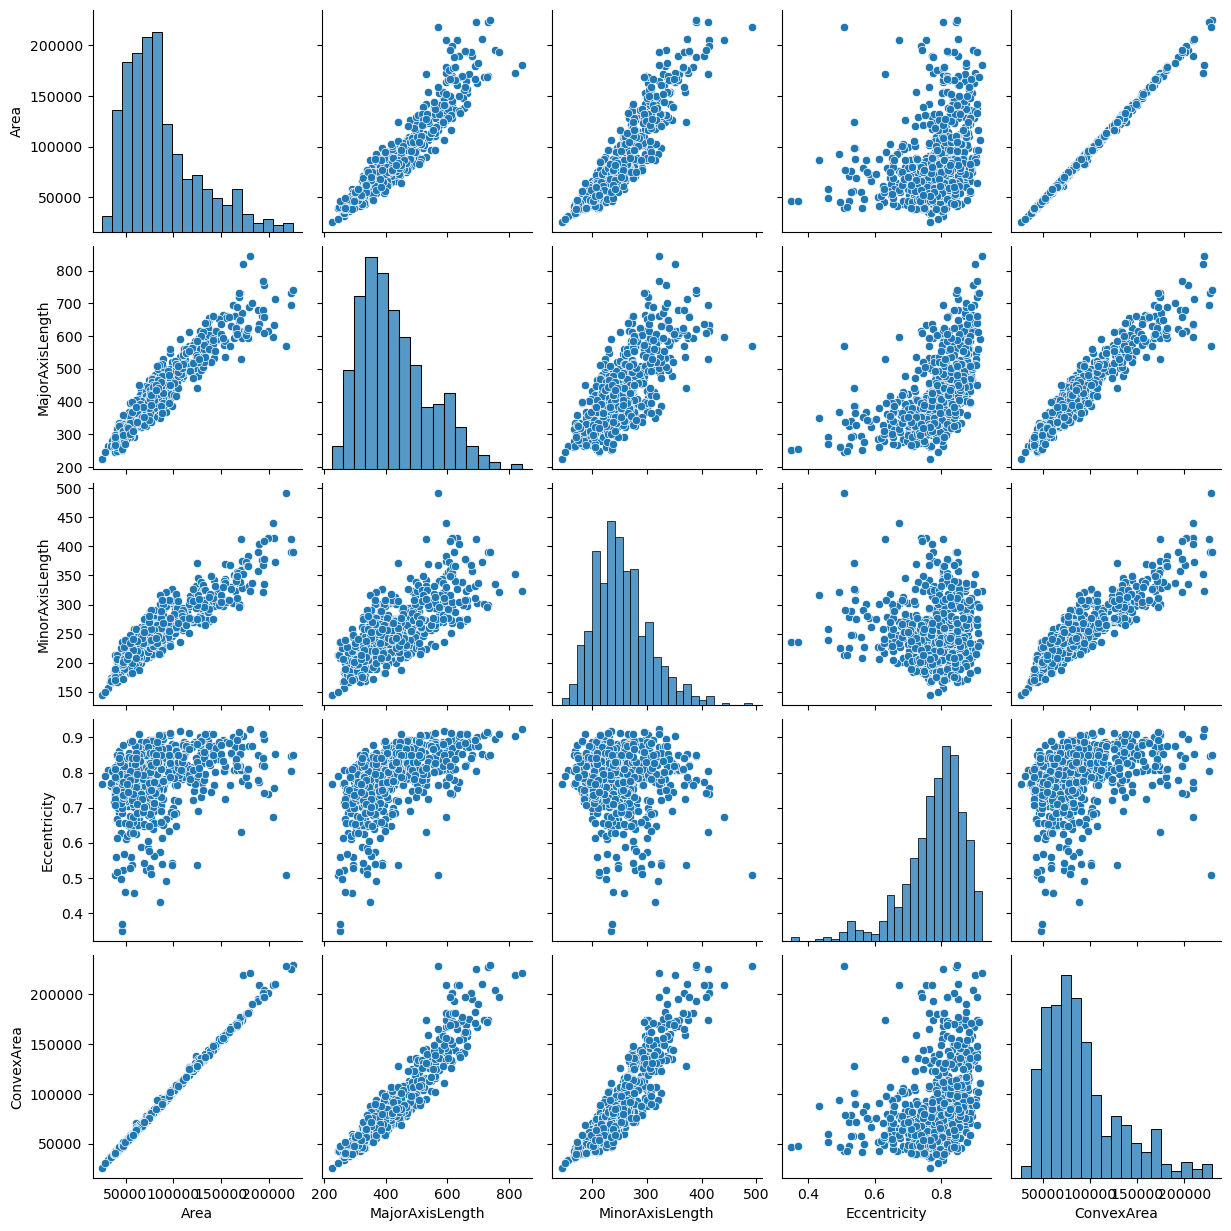

In [7]:
data = pd.get_dummies(data)

print(data.shape)
X = data.iloc[:, :7]
y = data.iloc[:, 7:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)
sns.pairplot(X_train[["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea"]])

In [8]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(7, )),
    Dense(16, activation="relu"),
    Dense(2, activation="softmax")
])

model.compile(loss="binary_crossentropy", optimizer="adam")
model.summary()

result = model.fit(X_train, y_train, validation_split=0.33, epochs=1000, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 0s 10ms/step - loss: 5349.2358 - val_loss: 1647.6147
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 863.8792 - val_loss: 856.4385
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 513.8074 - val_loss: 373.5925
Epo

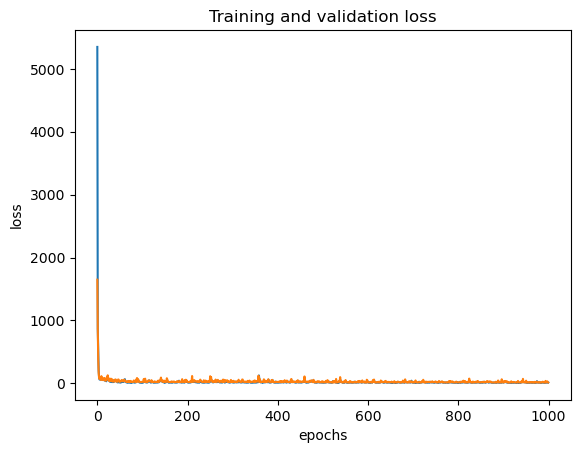

In [9]:
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
x = np.arange(0, 1000)
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.show()

In [10]:
class_dic = ["Kecimen", "Besni"]
pred = model.predict(X_test)

result = 0

for i in range(pred.shape[0]):
    if (class_dic[np.argmax(i)] == (class_dic[0] if (y_test.iloc[i]["Class_Kecimen"] == 1) else class_dic[1])): result += 1

print(result / pred.shape[0])

10/10 [==============================] - 0s 531us/step
0.5151515151515151
